In [42]:
# Librerías


from scipy.fft import fftfreq
from scipy.io.wavfile import read,write
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt
from scipy.signal import resample


## 2. Muestreo

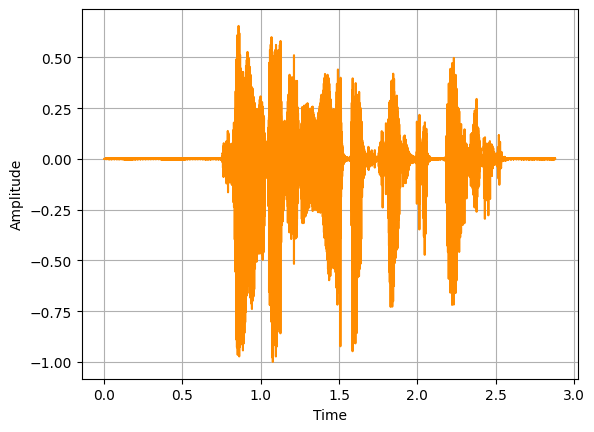

48000


In [39]:
'''
1. Cargue la señal correspondiente al último número de su cédula. Con base en el número total de muestras y a
la frecuencia de muestreo, grafique la señal en función del tiempo.
'''

audio = ("9.wav") # Cargo el audio en un archivo

fs, x = read(audio) # Leo el archivo

x = x/float(max(abs(x))) # Normalizo la amplitud

# Gráfica
time = np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo
plt.plot(time,x, '#FF8C00')
plt.xlabel('Time')
plt.grid()
plt.ylabel('Amplitude')
plt.show()

# Escuchar el audio
Audio(x, rate=fs)

# Como fs = 48000, tomaré fs1 y fs2 como valores numéricos a partir de ella para evitar errores

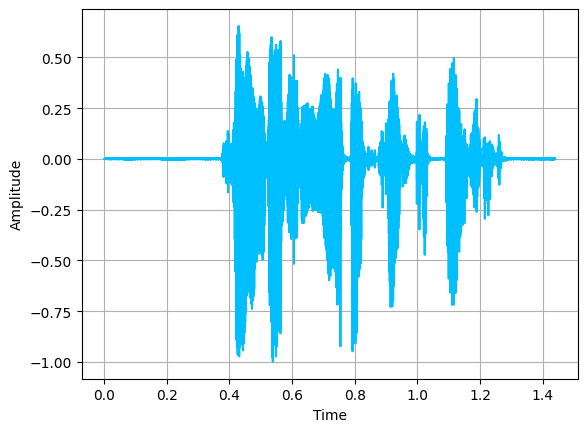

In [40]:
'''
2. Genere un nuevo archivo de audio con la misma señal pero al doble y luego con la mitad de la frecuencia de
muestreo original. Escuche el audio, ¿Qué diferencia nota? ¿A qué se debe esto?.
Tip: Para generar el archivo utilice las siguientes líneas:
from scipy . io . wavfile import write
write (' nuevarutadearcivo . wav ', nueva_fs , senal )
'''

# Doble de frecuencia de muestre
fs1 = 96000 # Duplico la frecuencia de muestreo

write ('audio1.wav',fs1, x) # Escribo la señal en audio1.wav

file_audio = ("audio1.wav")

fs, x1  = read(file_audio) # Leo el archivo

x1 = x1/float(max(abs(x1))) # Normalizo la amplitud

time1 = np.arange(0, float(len(x1))/fs1, 1.0/fs1) # Vector de tiempo

# Gráfica
plt.plot(time1,x, '#00BFFF')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Escuchar el audio
Audio(x1, rate=fs1)

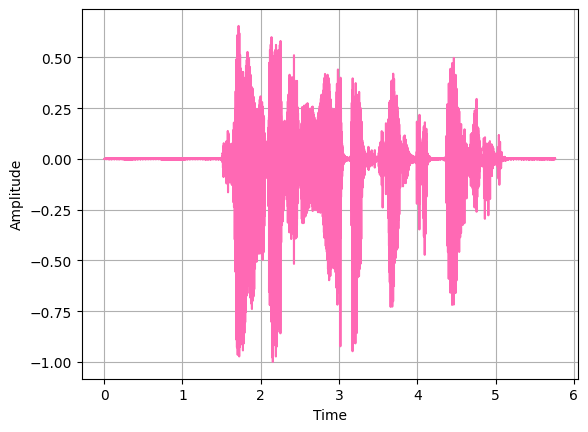

In [41]:
# Mitad de frecuencia de muestreo

fs2 = 24000

write ('audio2.wav',fs2, x)

file_audio = ("audio2.wav")

fs, x2 = read(file_audio) # Cargar el archivo

x2 = x2/float(max(abs(x2))) # Normalizo la amplitud

time2 = np.arange(0, float(len(x2))/fs2, 1.0/fs2)


# Gráfica
plt.plot(time2,x2, '#FF69B4')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Escuchar el audio
Audio(x2, rate=fs2)

Cuando se tiene fs1 (2fs) la señal se agudiza pero no pierde calidad, al tener fs2 (fs/2) la señal se oye más grave y su velocidad se reduce a la mitad pero no se pierde ni información ni calidad.

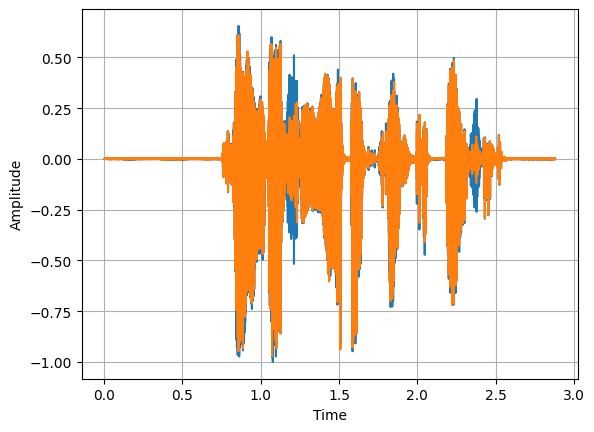

In [45]:
'''
3. Sub-muestree la señal usando un cuarto de la frecuencia de muestreo original. Reproduzca la señal resultante
y la original, ambas usando una frecuencia de fs/3. Grafique ambas señales en la misma figura. ¿Que puede
concluir?
Tip: use las siguientes instrucciones para el sub-muestreo:
from scipy . signal import resample
import numpy as np
senal2 = resample ( senal , int( len( senal ) /3) )
'''

file_audio=("9.wav") # Audio original

fs, a = read(file_audio) # Cargo el archivo

a = a/float(max(abs(a))) # Normalizo la señal

signal = resample (a , int(len(a)/4)) # Submuestreo la señal original y su fs se reduce a 1/4

Audio(signal, rate = int(fs/4)) # Reproduzco la señal submuestreada

Audio(a, rate = int(fs/4)) # Reproduzco la señal original

time3 = np.arange(0, float(len(signal))/(fs/4), 1.0/(fs/4))

# Gráfica
plt.plot(time,a,time3,signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Cuando se submuestrea una señal se reduce su número de muestras por segundo, esto implica una resolución temporal menor, menos detalles temporales que la original y menos calidad en comparación con la original.
Una frecuencia de muestreo fs más baja implica una cantidad de información disponible en la señal menor, atenuaciones en frecuencias altas y menor duración de la misma.

## 3. Frecuencia de Nyquist y Aliasing

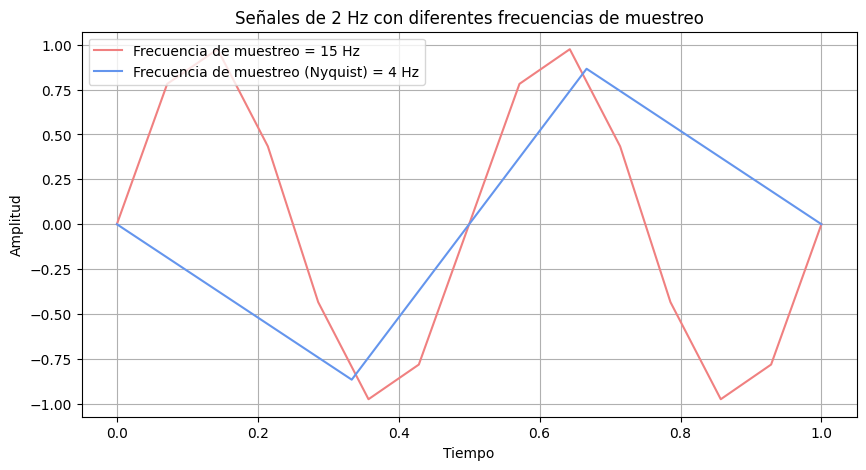

In [61]:
'''
1. Genere una señal sinusoidal con una frecuencia de 2 Hz y una frecuencia de muestreo de 15 Hz. Genere otra
señal sinusoidal de frecuencia 2 Hz y muéstrela según el teorema de Nyquist. Grafique selales en la misma
figura. ¿Qué diferencias encuentras?
'''


f = 2  # Frecuencia de la señal
fs = 15  # Frecuencia de muestreo
fsnyq = 2*f # Frecuencia de muestreo con nyquist
period = 1  # Periodos de la señal

time = np.linspace(0, period, int(period*fs))
signal1 = np.sin(2*np.pi*f*time)

time_nyquist = np.linspace(0, period, int(period*fsnyq))
signal2 = np.sin(2*np.pi*f*time_nyquist)


# Gráfica
plt.figure(figsize=(10,5))
plt.plot(time, signal1, '#F08080', label='Frecuencia de muestreo = 15 Hz')
plt.plot(time_nyquist, signal2, '#6495ED', label='Frecuencia de muestreo (Nyquist) = 4 Hz')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.title('Señales de 2 Hz con diferentes frecuencias de muestreo')
plt.legend()
plt.show()

A pesar de que ninguna de las dos señales está bien reconstruida debido a su baja frecuencia, apegarse al teorema de nyquist estrictamente no garantiza una calidad de señal necesaria, por lo que se concluye que la señal 2 a pesar de cumplir con este teorema presenta peor calidad que la señal 1 con mayor frecuencia de muestreo de la que plantea el teorema.

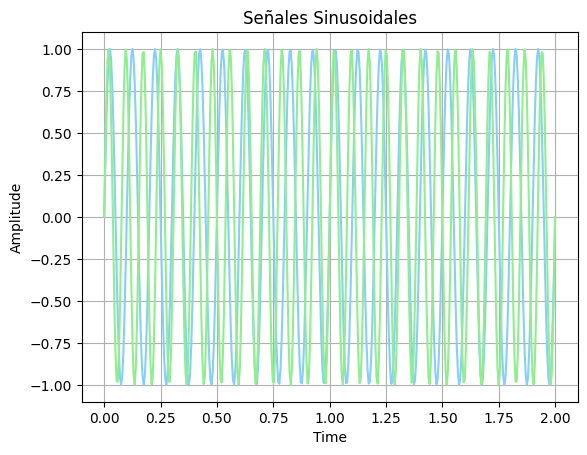

In [66]:
'''
2. Escriba un código que genere dos señales sinusoidales muestreadas con una frecuencia fs = (n + 1) ∗ 20 Hz.
La señal 1 tendrá una frecuencia f1 = (n + 1) Hz y la señal 2 tendrá una frecuencia f2 = 2 ∗ fs + (n + 3) Hz.
Tome n como ultimo dígito de su cédula. ¿Ambas señales quedan bien representadas. ¿A que se debe esto?.
'''

# Señal 1
n = 9
f1 = n + 1
fs = (n + 1) * 20
f2 = 2 * fs + (n + 3)

dur = 2 # Duración de la señal en segundos

time = np.linspace(0, dur, dur*fs)

sig1 = np.sin(2*np.pi*f1*time)
sig2 = np.sin(2*np.pi*f2*time)

# Gráficas
plt.plot(time, sig1, '#87CEFA', time, sig2, '#90EE90')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales')
plt.grid(True)
plt.show()
plt.show()

Ambas señales están bien representadas, comparten frecuencia de muestreo y aunque se notan picos en lugar de curvas suaves, presentan una cierta semejanza.



## 4. Cuantificación


In [106]:
'''
1. Use la función mostrada a continuación para re-cuantificar la señal de audio utilizada en los numerales anteriores a 2, 4 y 12 bits.
Escuche y grafique las señales re-cuantificadas. Compare gráficamente cada una de las
señales obtenidas con la señal original. ¿Qué pudo notar?.
'''

def fxquant (s , bit ) :
    # s: senal de entrada , debe estar normalizada entre -1 y 1
    # bit: bits de cuantizacion
    Plus1 = np.power (2 , ( bit -1) )
    X = s * Plus1
    X = np.round ( X )
    X = np.minimum ( Plus1 -1.0 , X )
    X = np.maximum ( -1.0* Plus1 , X )
    X = X / Plus1
    return X

# Cargo el audio original
file_audio=("9.wav")
fs, a=read(file_audio)
a=a/float(max(abs(a)))


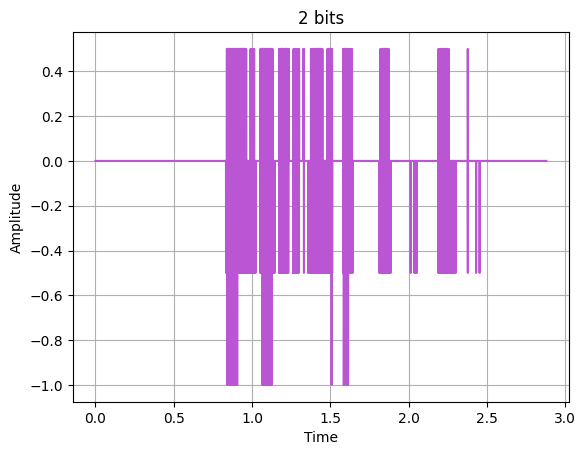

In [107]:
#2 Bits

s_2b = fxquant(a, 2)

plt.plot(t, s_2b,'#BA55D3')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('2 bits')
plt.grid(True)
plt.show()

Audio(s_2b, rate=fs)

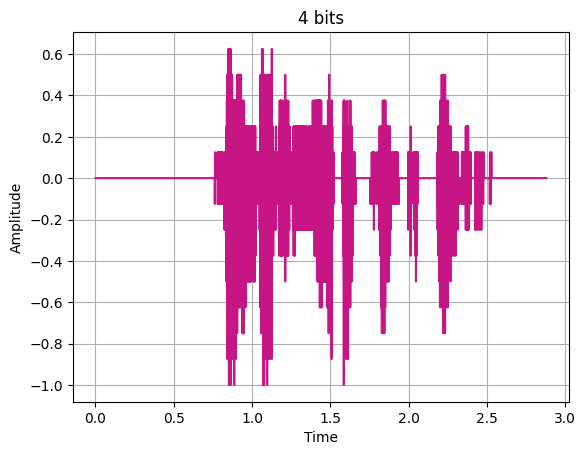

In [108]:
#4 Bits

s_4b = fxquant(x, 4)

plt.plot(t, s_4b, '#C71585')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('4 bits')
plt.grid(True)
plt.show()

Audio(s_4b, rate=fs)

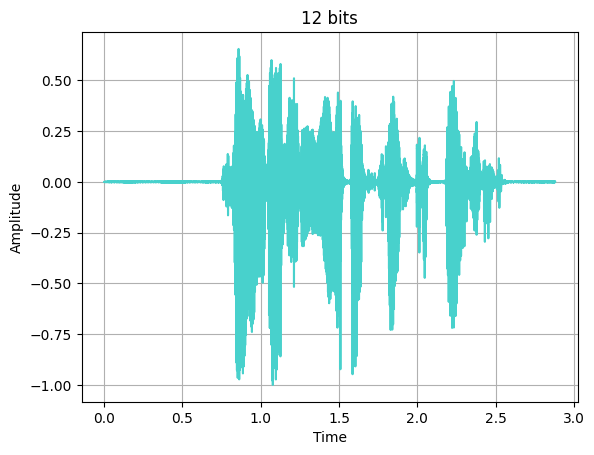

In [109]:
#12 Bits

s_12b = fxquant(a, 12,)

plt.plot(t, s_12b, '#48D1CC')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('12 bits')
plt.grid(True)
plt.show()

Audio(s_12b, rate=fs)

El ruido de cuantización se introduce a una señal al cuantizarla, se representa a través de discontinudades o curvas poco suaves en la misma.
Cuando se aumentan los niveles de cuantización y se hacen necesarios más bits para representar la señal, el ruido se reduce.

## 5. Generación de señales analógica y digital


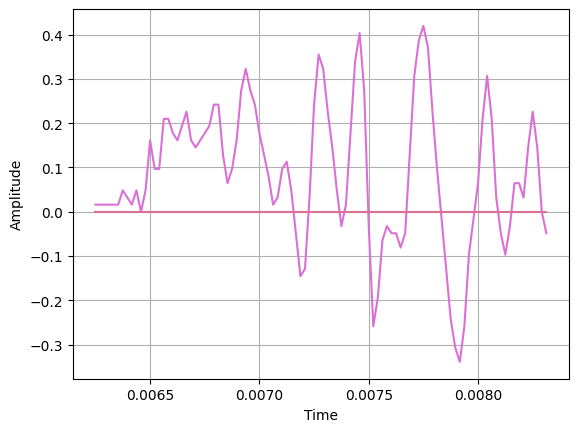

In [85]:
'''
1. Cargue la señal de audio correspondiente al último número de su cédula.
2. Para obtener la señal analógica, normalice el audio en amplitud y luego re-escale en un factor de 460. Use el
siguiente código como ayuda.
'''

file_audio = ("9.wav") # Audio original

fs, a = read(file_audio) # Cargo el archivo

a = a/float(max(abs(a))) # Normalizo la señal


# Obtención de la señal analógica
norm = 1.0 / np.max( np.abs(a))
sA = 460.0 * a * norm # Señal Analógica
sD = np.round(sA) # Señal Digital

time = np.arange(0, float(len(sA))/fs, 1.0/fs)

# Gráfica
plt.plot(time[300:400],sA[300:400], '#DA70D6',time[300:400],sD[300:400], '#DB7093')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()



La señal morada es la analógica, se puede visualizar con un poco de picos pero se alcanza a reconstruir un poquito, la señal digital se mira totalmente nula.
La señal analógica tiene muchísimos niveles de cuantización, la señal digital solo 3.

In [87]:
Audio(sA[300:400], rate=fs)

In [88]:
Audio(sD[300:400], rate=fs)

### 5.1 Transmisión

In [91]:
'''
1. Use la función llamada repeater(...) que recibe como entrada la señal a transmitir, la amplitud del ruido que
se desea agregar y la constante de atenuación. Esta función retorna la señal afectada por el ruido, atenuada,
y amplificada nuevamente.
'''

def repeater (x , noise_amplitude , attenuation ):
    x = x * attenuation
    Noise = np.random.uniform ( - noise_amplitude , noise_amplitude , len(x) )
    x = x + Noise
    x = x/attenuation
    return x

In [92]:
'''
2. La transmisión análoga no es más que una secuencia de repetidores, la cual puede ser implementada con la
siguiente función.
'''

def analog_tx (x , num_repeaters , noise_amplitude , attenuation ):
    for n in range (0 , num_repeaters ):
        x = repeater (x , noise_amplitude , attenuation )
    return x

In [93]:
'''
3. En el caso de la señal digital, comúnmente se vuelve a cuantificar la señal después de cada repetidor, ya que
sabemos que en este caso solo tenemos valores enteros, esto es implementado a partir de la siguiente función.
'''

def digital_tx (x , num_repeaters , noise_amplitude , attenuation ):
    for n in range (0 , num_repeaters ):
        x = np.round ( repeater (x , noise_amplitude , attenuation ) )
    return x

In [94]:
'''
4. Compare los esquemas de transmisión de las señales. Para ello defina el número de repetidores en 150, la
amplitud del ruido 0.15, y la constante de atenuación en 0.35. Luego realice la transmisión de las señal
análoga y digital en cada uno de sus respectivos esquemas de transmisión, y calcule la relación señal a ruido
(SNR) tanto para la señal análoga como digital. ¿Qué diferencia encuentra entre las señales?
Use la siguiente función para calcular la SNR:
'''

def SNR ( noisy , original ) :
    # power of the error
    err = np.var ( original - noisy )
    # power of the signal
    sig = np.var ( original )
    # SNR in dBs
    if err == 0:
        return 100 # Si el error es 0, retorna 100 como referencia. Ya que la expresión tendería a infinito.
    else:
        return 10 * np.log10 ( sig / err )

23.708873037871435
100


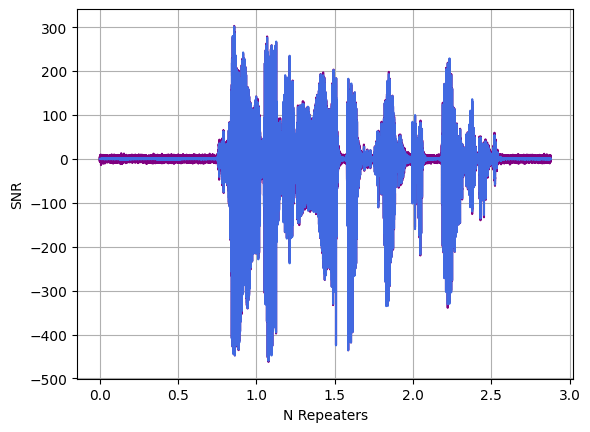

In [99]:
'''
5. Manteniendo constantes la amplitud de ruido y la atenuación, realice un barrido del número de repetidores
entre 10 y 100 (no lo haga de 1 en 1). Para cada iteracón realice la transmisión análoga y digital y calcule la
SNR para cada una. Al final grafique la SNR en función del número de repetidores. ¿Qué diferencia encuentra
entre las gráficas obtenidas?
'''

rep = 150 # Repetidores
noise = 0.15 # Amplitud del ruido
at = 0.35 # Atenuación

AT = analog_tx (sA , rep , noise , at)
DT = digital_tx (sD , rep , noise, at)

print (SNR (AT , sA))
print (SNR (DT , sD))

# Gráficas
plt.plot(time, AT, '#800080', time, sA, '#4169E1')
plt.xlabel('N Repeaters')
plt.ylabel('SNR')
plt.grid()
plt.show()

El SNR de la señal analógica es aproximadamente 23, esto indica una potencia de la señal 23 veces mayor que la del ruido.

Como la señal digital se reconstruye perfectamente, el error es cero y esto implica una imposibilidad de tener un SNR infinito, por lo que el valor de 100 es una referencia.

Respecto a las gráficas, la señal digital se reconstruye perfectamente (incluso luego de los repetidores).

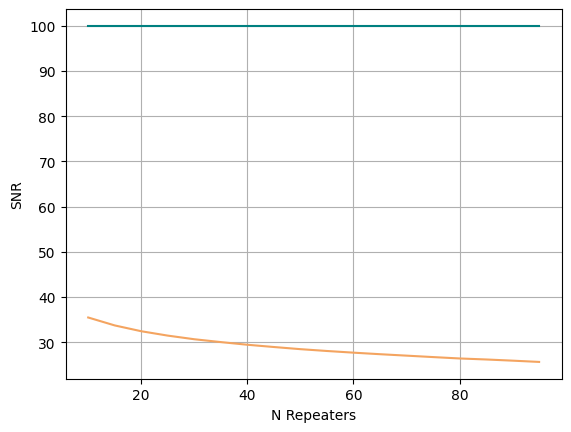

In [105]:
an, dig = [],[]
for i in range(10,100,5):
   AT = analog_tx (sA , i , noise , at)
   DT = digital_tx (sD , i, noise , at)

   an.append(SNR (AT , sA))
   dig.append(SNR (DT , sD))


# Gráficas
plt.plot(range(10,100,5), an, '#F4A460', range(10,100,5), dig, '#008080')
plt.xlabel('N Repeaters')
plt.ylabel('SNR')
plt.grid()
plt.show()

Como ya se mencionó, la señal digital no se atenúa tanto al pasar por los repetidores y se mantiene constante su SNR que se estableción en 100.

El valor SNR para la señal analógica va disminuyendo en forma exponencial al pasar por los repetidores, ya que al ser retransmitida y amplificada, su ruido también se amplifica.

Algunas otras conclusiones:

- A pesar de que el teorema de Nyquist establece cómo reconstruir una señal, debe tomarse como un valor mínimo pero no suficiente para la correcta reconstrucción de una señal.

- Los niveles de cuantización en el proceso de conversión de señales digitales a análogas son fundamentales para evitar la pérdida de información y calidad de la señal.

- En la transmisión analógica, el ruido juega un papel muy importante al afectar la señal de forma directa, provocando pérdida de información.